In [2]:
# !pip install claptcha

In [6]:
from claptcha import Claptcha
import random
import string
from PIL import Image
import os, glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [11]:
# os.mkdir('C:/Users/duadp/CAPTCHA/claptcha/')

In [9]:
word = ['0','1','2','3','4','5','6','7','8','9',
       'a','b','c','d','e','f','g','h','i','j','k',
       'l','m','n','o','p','q','r','s','t','u','v',
       'w','x','y','z']
length = 6
save_path = 'C:/Users/duadp/CAPTCHA/claptcha/'

np.random.seed(1234)

In [27]:
# capthcha data 생성, 저장 함수

def generate_claptcha(word, length, save_path):
    claptcha_text = []
    
    for i in range(length):
        c = random.choice(word)
        claptcha_text.append(c)
    claptcha_text = ''.join(claptcha_text)
    
    claptcha = Claptcha(claptcha_text, "C:/Windows/Fonts/verdana.ttf",
                        resample=Image.BICUBIC ,noise=0.4)
    
    # claptcha적용-> 바이트로 변환
#     text, bytes = claptcha.bytes
    claptcha.write(save_path +claptcha_text+'.png')
    


In [28]:
# 데이터 2000개 생성
for i in range(2000):
    generate_claptcha(word, length, save_path)

### 데이터 확인

In [13]:
os.chdir('C:/Users/duadp/CAPTCHA/claptcha/')
data = glob.glob("*.png")

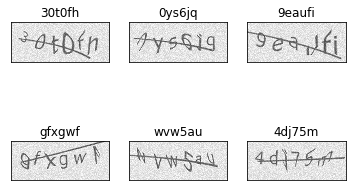

In [14]:
def draw_img(img_lst, row, col):
    img = []
    img_name = []
    for i in range(row*col):
        random_img = random.choice(img_lst)
        img.append(cv2.imread(random_img))
        img_name.append(random_img[:-4])
        
        
        plt.subplot(int(str(row)+str(col)+"1")+i)
        plt.imshow(img[i])
        plt.title(img_name[i])

        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        
    plt.show()
    
    
draw_img(data, 2,3)